# Analyzing Police Activity with pandas
Run the hidden code cell below to import the data used in this course.

In [1]:
# Import pandas
import pandas as pd

# Import the course datasets 
police = pd.read_csv('datasets/police.csv')
weather = pd.read_csv('datasets/weather.csv')

In [2]:
police.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [3]:
#null values
police.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [4]:
#shape
police.shape

(91741, 15)

In [5]:
#removing county_name since it have almost all null values
police.drop(['county_name'],axis=1,inplace=True)
police.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64

In [6]:
#droping null values rows for values null in "driver_gender"
police.dropna(subset=["driver_gender"],inplace=True)
police.isnull().sum()

state                     0
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64

No more null values!!

In [7]:
#checking dtypes 
police.dtypes

state                 object
stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [8]:
# Examine the head of the 'is_arrested' column
print(police.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
police['is_arrested'] = police.is_arrested.astype("bool")

# Check the data type of 'is_arrested' 
print(police.is_arrested.dtypes)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


### Creating a DatetimeIndex

In [9]:
#combining 'stop_date' & 'stop_time'
police['stop_date_time']=police.stop_date.str.cat(police.stop_time,sep=" ")
police['stop_date_time']

0        2005-01-04 12:55
1        2005-01-23 23:15
2        2005-02-17 04:15
3        2005-02-20 17:15
4        2005-02-24 01:20
               ...       
91736    2015-12-31 21:21
91737    2015-12-31 21:59
91738    2015-12-31 22:04
91739    2015-12-31 22:09
91740    2015-12-31 22:47
Name: stop_date_time, Length: 86536, dtype: object

In [10]:
#converting into datetime and seting index
police['stop_date_time'] = pd.to_datetime(police['stop_date_time'])
print(police['stop_date_time'])

police.set_index('stop_date_time',inplace=True)
police.index

0       2005-01-04 12:55:00
1       2005-01-23 23:15:00
2       2005-02-17 04:15:00
3       2005-02-20 17:15:00
4       2005-02-24 01:20:00
                ...        
91736   2015-12-31 21:21:00
91737   2015-12-31 21:59:00
91738   2015-12-31 22:04:00
91739   2015-12-31 22:09:00
91740   2015-12-31 22:47:00
Name: stop_date_time, Length: 86536, dtype: datetime64[ns]


DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_date_time', length=86536, freq=None)

### Do the genders commit different violations?

In [11]:
# Count the unique values in 'violation'
print(police.violation.value_counts())

print()

# Express the counts as proportions
print(police["violation"].value_counts(normalize = True))

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


In [12]:
# Create a DataFrame of female drivers
female = police[police["driver_gender"]=='F']

# Create a DataFrame of male drivers
male = police[police["driver_gender"]=="M"]

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

print()

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64

Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


### Does gender affects who gets ticket for speeding?

In [13]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = police[(police.driver_gender == 'F') & (police.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = police[(police.driver_gender == 'M') & (police.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize = True))

print()

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


### Does gender affect whose vehicle is searched?

In [14]:
# Calculate the search rate for both groups simultaneously
print(police.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [15]:
#groupby 'driver_gender' & 'violation'
police.groupby(['violation','driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

### Does gender affect who is frisked during a search?

In [16]:
# Count the 'search_type' values
print(police.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
police['frisk'] = police.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(police.frisk.dtypes)

# Take the sum of 'frisk'
print(police.frisk.sum())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [17]:
# Create a DataFrame of stops in which a search was conducted
searched = police[police.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


### Does time of day affect arrest rate?

In [18]:
# Calculate the overall arrest rate
print(police.is_arrested.mean())

# Calculate the hourly arrest rate
print(police.groupby(police.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = police.groupby(police.index.hour).is_arrested.mean()

0.0355690117407784
stop_date_time
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


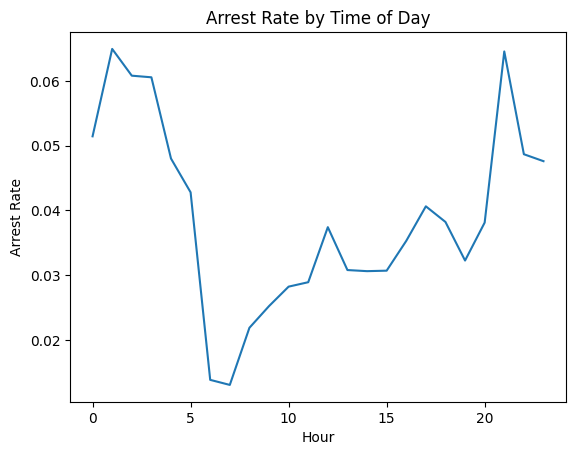

In [19]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

### Are drug-related stops on the rise?

stop_date_time
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


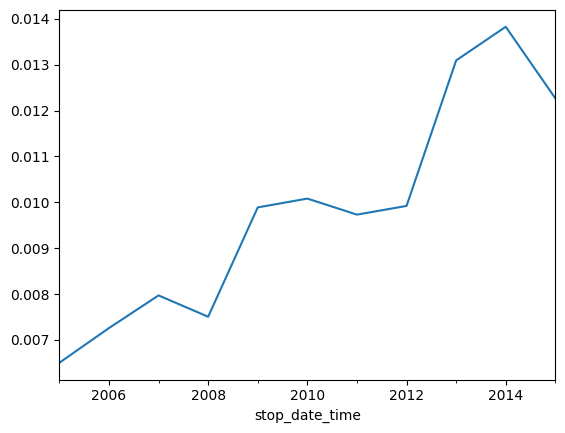

In [20]:
# Calculate the annual rate of drug-related stops
print(police.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = police.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

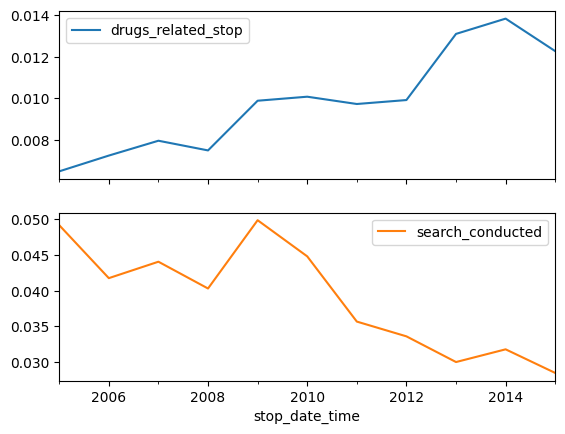

In [21]:
# Calculate and save the annual search rate
annual_search_rate = police.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis= 'columns')

#plot
annual.plot(subplots = True)
plt.show()

### What violations are caught in each district?

In [22]:
# Create a frequency table of districts and violations
print(pd.crosstab(police.district,police.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(police.district,police.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1' : 'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1' : 'Zone K3']

violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322
Zone X1          296               671  ...         74      1119
Zone X3         2049              3086  ...        820      8779
Zone X4         3541              5353  ...        843      9795

[6 rows x 6 columns]
violation  Equipment  Moving violation  ...  Seat belt  Speeding
district                                ...                     
Zone K1          672              1254  ...          0      5960
Zone K2         2061              2962  ...        481     10448
Zone K3         2302              2898  ...        638     12322

[3 rows x 6 columns]


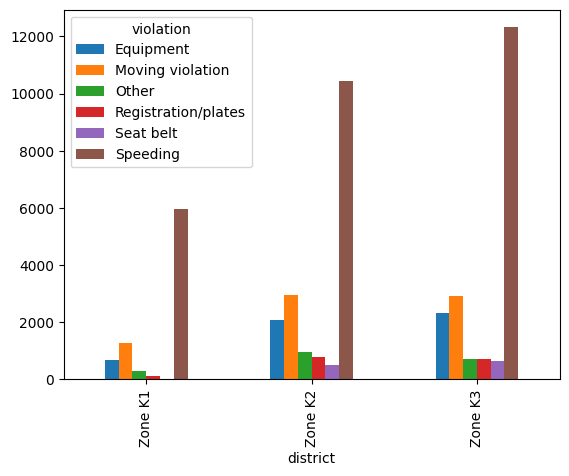

In [23]:
#visualization
k_zones.plot(kind='bar')
plt.show()

### How long might you be stopped for a violation?

In [24]:
# Print the unique values in 'stop_duration'
print(police.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8,'16-30 Min': 23,'30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
police['stop_minutes'] = police.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(police.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


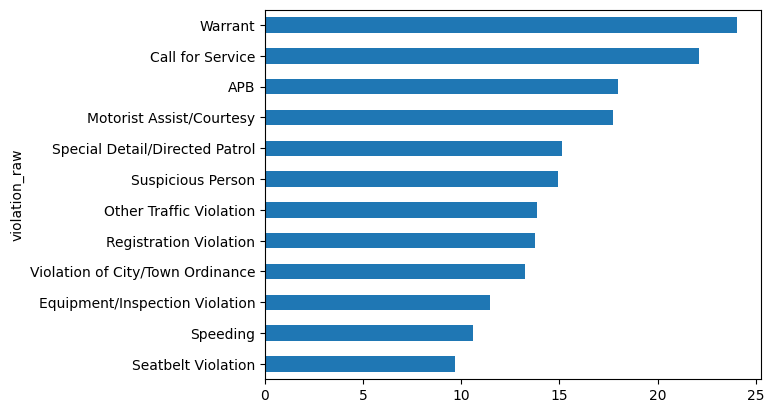

In [25]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(police.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = police.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

### Exploring the weather dataset

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


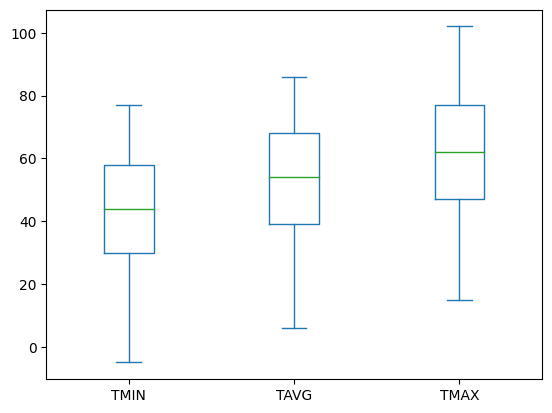

In [26]:
# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


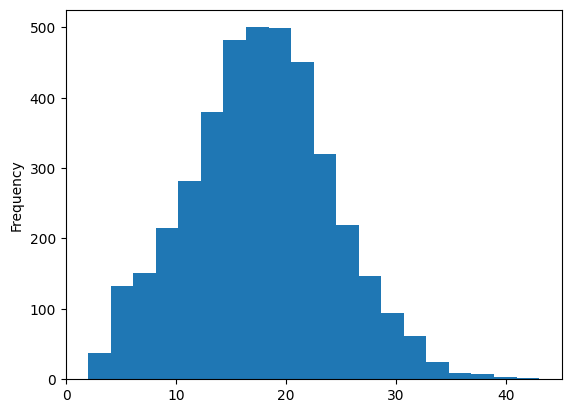

In [27]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].plot(kind='hist',bins=20)

# Display the plot
plt.show()

### Categorizing the weather

      WT01  WT02  WT03  WT04  WT05  WT06  ...  WT16  WT17  WT18  WT19  WT21  WT22
0      1.0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
1      NaN   NaN   NaN   NaN   NaN   NaN  ...   1.0   NaN   1.0   NaN   NaN   NaN
2      1.0   NaN   NaN   NaN   NaN   NaN  ...   1.0   NaN   NaN   NaN   NaN   NaN
3      1.0   NaN   NaN   NaN   NaN   NaN  ...   1.0   NaN   NaN   NaN   NaN   NaN
4      1.0   NaN   NaN   NaN   NaN   NaN  ...   1.0   NaN   1.0   NaN   NaN   NaN
...    ...   ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...
4012   1.0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4013   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN
4014   1.0   NaN   NaN   1.0   NaN   1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN
4015   1.0   NaN   NaN   NaN   NaN   1.0  ...   NaN   NaN   NaN   NaN   NaN   NaN
4016   1.0   NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN

[4017 rows x 20

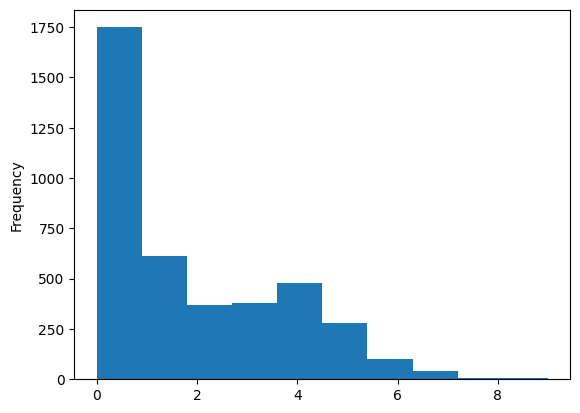

In [28]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:,'WT01':'WT22']

print(WT)

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

In [29]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad',4:'bad',5:'worse',6:'worse',7:'worse',8:'worse',9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


### Changing the data type to category

In [30]:
# Specify the logical order of the weather ratings
cats = pd.CategoricalDtype(['good','bad','worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cats)

# Examine the head of 'rating'
print(weather['rating'].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


## Merging datasets

In [31]:
# Reset the index of 'ri'
police.reset_index(inplace=True)

# Examine the head of 'ri'
print(police.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

       stop_date_time state   stop_date  ... district  frisk stop_minutes
0 2005-01-04 12:55:00    RI  2005-01-04  ...  Zone X4  False            8
1 2005-01-23 23:15:00    RI  2005-01-23  ...  Zone K3  False            8
2 2005-02-17 04:15:00    RI  2005-02-17  ...  Zone X4  False            8
3 2005-02-20 17:15:00    RI  2005-02-20  ...  Zone X1  False           23
4 2005-02-24 01:20:00    RI  2005-02-24  ...  Zone X3  False            8

[5 rows x 17 columns]
         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [32]:
# Examine the shape of 'ri'
print(police.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=police, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_date_time', inplace=True)

print(ri_weather)

(86536, 17)
(86536, 19)
                    state   stop_date  ...        DATE rating
stop_date_time                         ...                   
2005-01-04 12:55:00    RI  2005-01-04  ...  2005-01-04    bad
2005-01-23 23:15:00    RI  2005-01-23  ...  2005-01-23  worse
2005-02-17 04:15:00    RI  2005-02-17  ...  2005-02-17   good
2005-02-20 17:15:00    RI  2005-02-20  ...  2005-02-20    bad
2005-02-24 01:20:00    RI  2005-02-24  ...  2005-02-24    bad
...                   ...         ...  ...         ...    ...
2015-12-31 21:21:00    RI  2015-12-31  ...  2015-12-31    bad
2015-12-31 21:59:00    RI  2015-12-31  ...  2015-12-31    bad
2015-12-31 22:04:00    RI  2015-12-31  ...  2015-12-31    bad
2015-12-31 22:09:00    RI  2015-12-31  ...  2015-12-31    bad
2015-12-31 22:47:00    RI  2015-12-31  ...  2015-12-31    bad

[86536 rows x 18 columns]


### Does weather affect the arrest rate?

In [33]:
ri_weather.columns

Index(['state', 'stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district', 'frisk', 'stop_minutes', 'DATE', 'rating'],
      dtype='object')

In [34]:
#arrest rate
ri_weather.is_arrested.mean()

0.0355690117407784

In [35]:
#arrest rate on different weather
ri_weather.groupby('rating').is_arrested.mean()

rating
good     0.033715
bad      0.036261
worse    0.041667
Name: is_arrested, dtype: float64

In [36]:
#arrest rate on different 'violation' and 'rating'
ri_weather.groupby(['violation','rating']).is_arrested.mean()

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

### Selecting from a multi-indexed Series

In [38]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation','bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

0.05804964058049641
rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [39]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
rating                   good       bad     worse
violation                                        
Equipment            0.059007  0.066311  0.097357
Moving violation     0.056227  0.058050  0.065860
Other                0.076966  0.087443  0.062893
Registration/plates  0.081574  0.098160  0.115625
Seat belt            0.028587  0.022493  0.000000
Speeding             0.013405  0.013314  0.016886
